In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import os
from osgeo import gdal,ogr, osr
from math import ceil
import sys, re

In [2]:
def display_img(img):
    if len(img.shape)==2:
        cmap='gray'
    else:
        cmap=None
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap=cmap)

In [6]:
os.chdir(r"E:\Projects\idc_uav\GDAL\Test")
file = '07222016_100FtAmeniaDGCI_2.tif'
grid_size=7

In [7]:
im = cv2.imread(file)

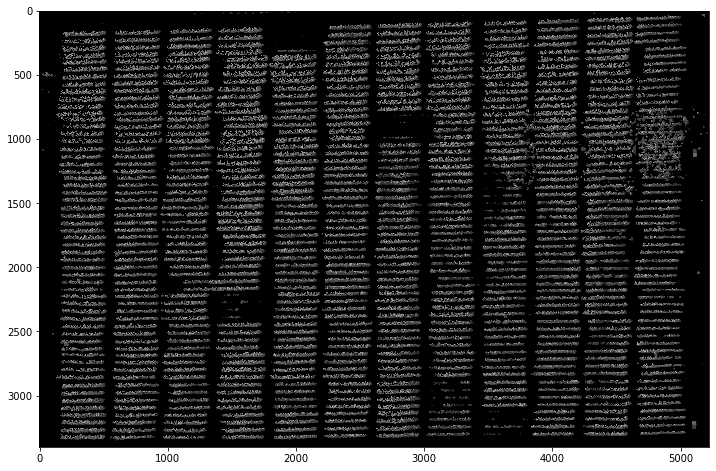

In [8]:
display_img(im)

In [9]:
# Open the tiff file with GDAL to extract spatial information
ds_wgs84 = gdal.Open(file)

In [22]:
# Since the fishnet is bigger than the tiff file, I needed to add padding.
fishnet_arr = np.zeros((height_num_cell,width_num_cell),dtype=np.uint16)
for i in range(field.shape[0]):
    for j in range(field.shape[1]):
        fishnet_arr[i,j] = field[i,j]
fishnet_arr

array([[12792, 24928, 23124, 22960, 23288, 23698,  5002],
       [12218, 26240, 25666, 22796, 26240, 28126, 11726],
       [11726, 28782, 27470, 23288, 27306, 26568, 12710],
       [12382, 27880, 27306, 23780, 27798, 27060, 13284],
       [ 7872, 18942, 21566, 17876, 18778, 18122,  8200],
       [    0,     0,     0,     0,     0,     0,     0]], dtype=uint16)

In [23]:
# The set feature of OGR should use the transpose of the field values in order to write them into the fishnet.
field_T = np.transpose(fishnet_arr)
field_T = list(field_T.flatten())

In [24]:
# Create attribute field (pp: plant population)

# Open a Shapefile, and get field names
source = ogr.Open(fn, update=True)
layer = source.GetLayer()
layer_defn = layer.GetLayerDefn()
field_names = [layer_defn.GetFieldDefn(i).GetName() for i in range(layer_defn.GetFieldCount())]
print ([len(field_names), 'MYFLD' in field_names])

# Add a new field
new_field = ogr.FieldDefn('PP', ogr.OFTInteger)
layer.CreateField(new_field)

# Close the Shapefile
source = None

[1, False]


In [25]:
# Assign values to pp feature

driver = ogr.GetDriverByName('ESRI Shapefile')
dataSource = driver.Open(fn, 1)

layer = dataSource.GetLayer()
feature = layer.GetNextFeature()
print(type(feature))
i=0

while feature:
    
    feature.SetField("pp", int(field_T[i]))
    layer.SetFeature(feature)
    feature = layer.GetNextFeature()
    i += 1
    
dataSource.Destroy()

<class 'osgeo.ogr.Feature'>


In [26]:
info = gdal.Info(ds_utm16).split(r"\n")
for i in info:
    print(i)

Driver: MEM/In Memory Raster
Files: none associated
Size is 6377, 5658
Coordinate System is:
PROJCRS["WGS 84 / UTM zone 16N",
    BASEGEOGCRS["WGS 84",
        DATUM["World Geodetic System 1984",
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["UTM zone 16N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",-87,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",0.9996,
            SCALEUNIT["unity",1],
            ID["EPSG",8805]],
        PARAMETER["False easting",500000,
            LENGTHUNIT["metre",1],
            ID["EPSG",8806]],
    